# A higher-fidelity 30 micron scan

In [2]:
from Wayne_Itano_Code import ItanoAnalysis

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

if __name__ == '__main__':
    import time
    date=time.strftime("%d%m%Y")
    
    
    a = ItanoAnalysis(quiet=False, ywidth=30E-6)
    filename="Case1"
    df=np.linspace(-80.0E6,-5.0E6,10)
    doff=np.linspace(0.0E-6,40.0E-6,10)
    
    A = a.scan_detuning_and_offset(detuninglist=df,offsetlist=doff, get_scatter_and_torque=False)
    filename+=date
    np.save(filename,A)

In [10]:
#
%matplotlib inline
import time
start_time = time.time()
import numpy as np
import scipy as sp
import scipy.optimize as opt
import scipy.integrate as integ
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
plt.rcParams['font.size'] = 18
Teq=A[0]*1000

Teqmask = np.ma.array (Teq, mask=np.isnan(Teq))
#Teqmask= np.ma.array(Teqmask, mask = Teq>=40)


offsetmin,freqmin=np.unravel_index(Teqmask.argmin(), Teqmask.shape)

#offsetmin=np.argmin(Teqmask)
#freqmin=np.argmin(Teqmask)
#if freqmin>=len(df):
#    freqmin=freqmin-len(doffn)*(freqmin%len(df))

df=np.linspace(-80.0E6,-5.0E6,40)
doff=np.linspace(0.0E-6,40.0E-6,40)

dfn=df*1.0E-6
doffn=doff*1.0E6    
print("Minimum temperature %.3f" %np.amin(Teqmask),"mK occurs at detuning %2.f" %dfn[freqmin],"MHz and offset %.f" %doffn[offsetmin],"micron")

CS= plt.figure(figsize=(12, 10))
cmap = plt.cm.Blues_r
CS = plt.pcolor(dfn,doffn, Teqmask, cmap=cmap, vmin=np.nanmin(Teqmask), vmax=np.nanmax(Teqmask))
CS=plt.ylim(doffn[0],doffn[-1])
CS=plt.xlim(dfn[0],dfn[-1])
CS=plt.xlabel('Laser Detuning $\Delta$ (MHz)')
CS=plt.ylabel('Laser Offset $d$ $(\mu m)$ ')
CS=plt.title('$\omega_y=30\mu$m: Equilibrium Temperature',y=1.03)
CS= plt.colorbar()
CS= plt.contour(dfn,doffn, Teqmask, colors='white', levels=[.65,.7,.8,1])
CS= plt.clabel(CS, inline=1, fontsize=10, fmt='%1.1f')
CS = plt.plot(dfn[freqmin],doffn[offsetmin],"*",color="white",markersize=20.0,
              label="Min. Temp. = %.2f at (%2.f,%2.f)" %(np.amin(Teqmask),dfn[freqmin], doffn[offsetmin]))
leg=plt.legend(loc=2,fontsize=13,numpoints=1,fancybox=False)
leg.get_frame().set_alpha(1)


SyntaxError: invalid syntax (<ipython-input-10-3440ddff267e>, line 12)

C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


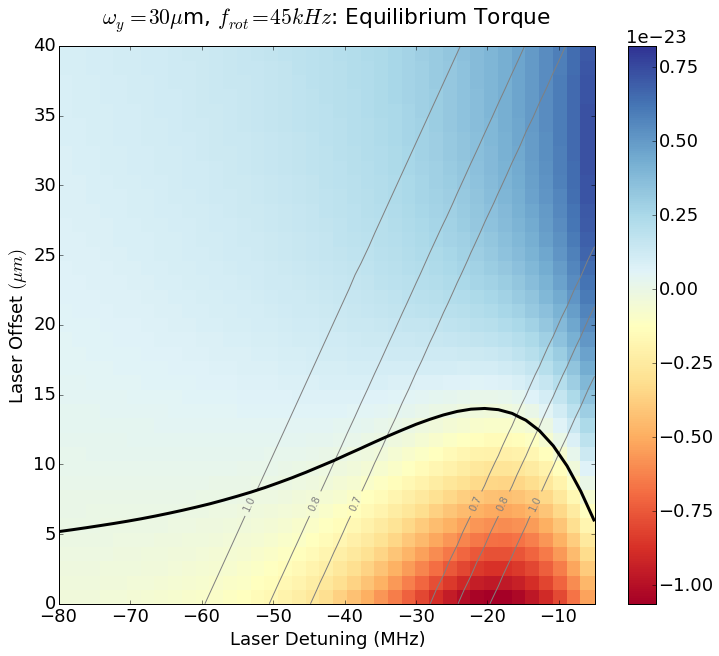

In [153]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

plt.rcParams['font.size'] = 18
Trq= A[1]
Trqmask = np.ma.array (Trq, mask=np.isnan(Teq))
#Teqmask= np.ma.array(Teqmask, mask = Teq>=40)


offsetmin,freqmin=np.unravel_index(Trqmask.argmin(), Trqmask.shape)

#offsetmin=np.argmin(Teqmask)
#freqmin=np.argmin(Teqmask)
#if freqmin>=len(df):
#    freqmin=freqmin-len(doffn)*(freqmin%len(df))

dfn=df*1.0E-6
doffn=doff*1.0E6    

CS= plt.figure(figsize=(12, 10))
cmap=plt.cm.RdYlBu
#cmap=shiftedColorMap(cmap,start=np.min(Trqmask),midpoint=0,stop=np.max(Trqmask))
cmap=shiftedColorMap(cmap,midpoint=.5)
CS = plt.pcolor(dfn,doffn, Trqmask, cmap=cmap, vmin=np.nanmin(Trqmask), vmax=np.nanmax(Trqmask))
CS=plt.ylim(doffn[0],doffn[-1])
CS=plt.xlim(dfn[0],dfn[-1])
CS=plt.xlabel('Laser Detuning $\Delta$ (MHz)')
CS=plt.ylabel('Laser Offset $d$ $(\mu m)$ ')
CS=plt.title('$\omega_y=30\mu$m, $f_{rot}= 45 kHz$: Equilibrium Torque',y=1.03)
CS= plt.colorbar()
CS= plt.contour(dfn,doffn, Teqmask, colors='gray', levels=[.7,.8,1])
CS= plt.clabel(CS, inline=1, fontsize=10, fmt='%1.1f')
CS = plt.contour(dfn,doffn,Trqmask,colors="black",levels=[0],linewidths=3, label="O Torque")
leg=plt.legend(loc=2,fontsize=13,numpoints=1,fancybox=False)


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


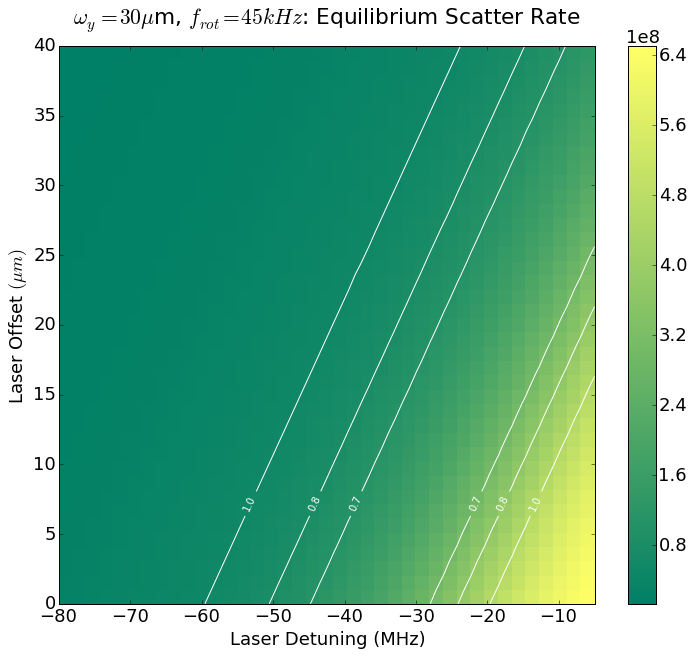

In [154]:

Sct= A[2]
Sctmask = np.ma.array (Sct, mask=np.isnan(Sct))
#Teqmask= np.ma.array(Teqmask, mask = Teq>=40)

dfn=df*1.0E-6
doffn=doff*1.0E6    

CS= plt.figure(figsize=(12, 10))
cmap=plt.cm.summer
#cmap=shiftedColorMap(cmap,start=np.min(Trqmask),midpoint=0,stop=np.max(Trqmask))
CS = plt.pcolor(dfn,doffn, Sctmask, cmap=cmap, vmin=np.nanmin(Sctmask), vmax=np.nanmax(Sctmask))
CS=plt.ylim(doffn[0],doffn[-1])
CS=plt.xlim(dfn[0],dfn[-1])
CS=plt.xlabel('Laser Detuning $\Delta$ (MHz)')
CS=plt.ylabel('Laser Offset $d$ $(\mu m)$ ')
CS=plt.title('$\omega_y=30\mu$m, $f_{rot}= 45 kHz$: Equilibrium Scatter Rate',y=1.03)
CS= plt.colorbar()
CS= plt.contour(dfn,doffn, Teqmask, colors='white', levels=[.7,.8,1])
CS= plt.clabel(CS, inline=1, fontsize=10, fmt='%1.1f')

leg=plt.legend(loc=2,fontsize=13,numpoints=1,fancybox=False)


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


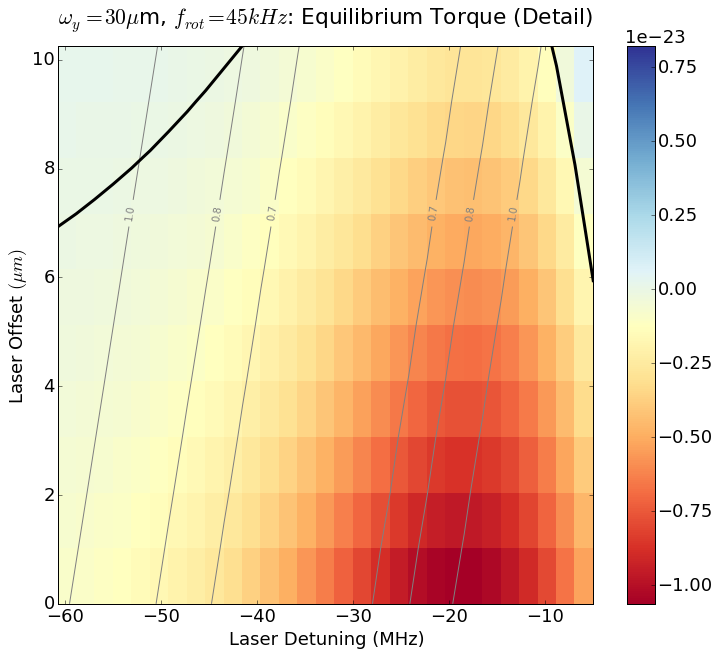

In [155]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

plt.rcParams['font.size'] = 18
Trq= A[1]
Trqmask = np.ma.array (Trq, mask=np.isnan(Teq))
#Teqmask= np.ma.array(Teqmask, mask = Teq>=40)


offsetmin,freqmin=np.unravel_index(Trqmask.argmin(), Trqmask.shape)

#offsetmin=np.argmin(Teqmask)
#freqmin=np.argmin(Teqmask)
#if freqmin>=len(df):
#    freqmin=freqmin-len(doffn)*(freqmin%len(df))

dfn=df*1.0E-6
doffn=doff*1.0E6    

CS= plt.figure(figsize=(12, 10))
cmap=plt.cm.RdYlBu
#cmap=shiftedColorMap(cmap,start=np.min(Trqmask),midpoint=0,stop=np.max(Trqmask))
cmap=shiftedColorMap(cmap,midpoint=.5)
CS = plt.pcolor(dfn,doffn, Trqmask, cmap=cmap, vmin=np.nanmin(Trqmask), vmax=np.nanmax(Trqmask))
CS=plt.ylim(doffn[0],doffn[10])
CS=plt.xlim(dfn[10],dfn[39])
CS=plt.xlabel('Laser Detuning $\Delta$ (MHz)')
CS=plt.ylabel('Laser Offset $d$ $(\mu m)$ ')
CS=plt.title('$\omega_y=30\mu$m, $f_{rot}= 45 kHz$: Equilibrium Torque (Detail)',y=1.03)
CS= plt.colorbar()
CS= plt.contour(dfn,doffn, Teqmask, colors='gray', levels=[.7,.8,1])
CS= plt.clabel(CS, inline=1, fontsize=10, fmt='%1.1f')
CS = plt.contour(dfn,doffn,Trqmask,colors="black",levels=[0],linewidths=3, label="O Torque")
leg=plt.legend(loc=2,fontsize=13,numpoints=1,fancybox=False)


Minimum temperature 0.630 mK occurs at detuning -5 MHz and offset 35 micron
0.651760739531 0.651760739531 4.48498236291 4.48498236291


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


AttributeError: 'NoneType' object has no attribute 'get_frame'

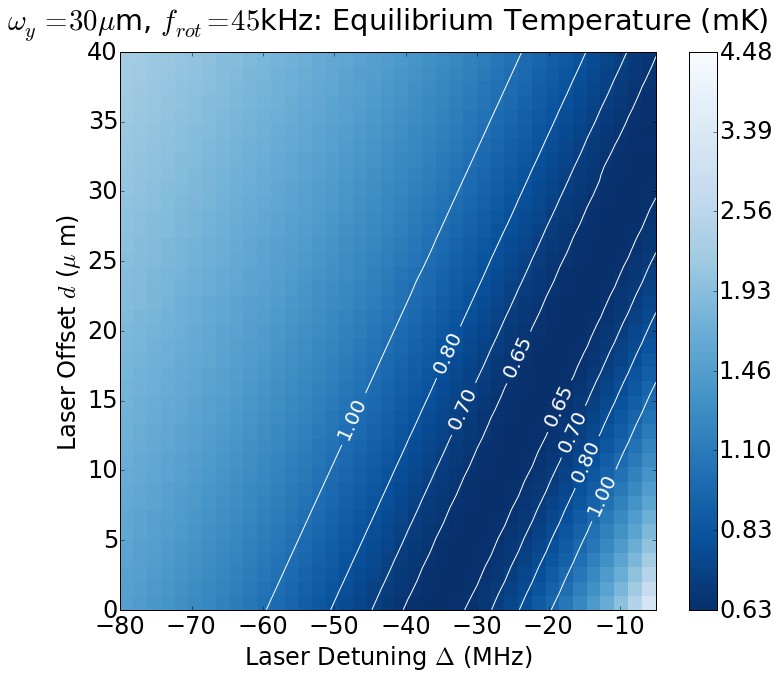

In [19]:
#
%matplotlib inline
import time
start_time = time.time()
import numpy as np
import scipy as sp
import scipy.optimize as opt
import scipy.integrate as integ
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
plt.rcParams['font.size'] =24 
Teq=A[0]*1000

Teqmask = np.ma.array (Teq, mask=np.isnan(Teq))
#Teqmask= np.ma.array(Teqmask, mask = Teq>=10)


offsetmin,freqmin=np.unravel_index(Teqmask.argmin(), Teqmask.shape)

#offsetmin=np.argmin(Teqmask)
#freqmin=np.argmin(Teqmask)
#if freqmin>=len(df):
#    freqmin=freqmin-len(doffn)*(freqmin%len(df))

dfn=df*1.0E-6
doffn=doff*1.0E6    
print("Minimum temperature %.3f" %np.amin(Teqmask),"mK occurs at detuning %2.f" %dfn[freqmin],"MHz and offset %.f" %doffn[offsetmin],"micron")

CS= plt.figure(figsize=(12, 10))
cmap = plt.cm.Blues_r
CS = plt.pcolor(dfn,doffn, np.log10(Teqmask), cmap=cmap, vmin=np.nanmin(np.log10(Teqmask)), vmax=np.nanmax(np.log10(Teqmask)))
CS=plt.ylim(doffn[0],doffn[-1])
CS=plt.xlim(dfn[0],dfn[-1])
CS=plt.xlabel('Laser Detuning $\Delta$ (MHz)')
CS=plt.ylabel('Laser Offset $d$ ($\mu$ m) ')
CS=plt.title('$\omega_y=30\mu$m, $f_{rot}= 45 $kHz: Equilibrium Temperature (mK)',y=1.03)
cbar = plt.colorbar()
cmin,cmax = cbar.get_clim()
ticks=np.linspace(cmin,cmax,8)
print(ticks[-1],cmax,10**cmax,np.max(Teqmask))
cbar.set_ticks(ticks)
ticks=10**ticks
ticks=["%.2f" %label for label in ticks]

cbar.ax.set_yticklabels(ticks)
#cbar.ax.set_yticklabels([0,1,np.max(Teqmask)])
#cbar.set_label('Equilibrium Temperature (Log 10, mK)', rotation=270,x=200)
CS= plt.contour(dfn,doffn, Teqmask, colors='white', levels=[.65,.7,.8,1])
CS= plt.clabel(CS, inline=1, fontsize=20, fmt='%1.2f')
#CS = plt.plot(dfn[freqmin],doffn[offsetmin],"*",color="white",markersize=20.0,
#              label="Min. Temp. = %.2f at (%2.f,%2.f)" %(np.amin(Teqmask),dfn[freqmin], doffn[offsetmin]))
#CS = plt.plot(dfn[freqmin],doffn[offsetmin],"*",color="white",markersize=20.0,
#              label="Min. Temp. = %.2f at (%2.f,%2.f)" %(np.amin(Teqmask),dfn[freqmin], doffn[offsetmin]))
leg=plt.legend(loc=2,fontsize=13,numpoints=1,fancybox=False)
leg.get_frame().set_alpha(1)


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


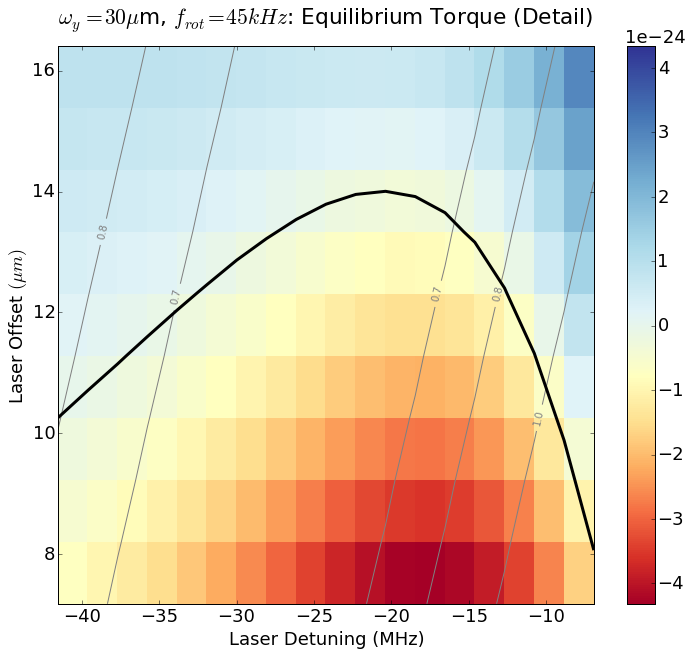

In [157]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

plt.rcParams['font.size'] = 18
Trq= A[1]
Trqmask = np.ma.array (Trq, mask=np.isnan(Teq))
#Teqmask= np.ma.array(Teqmask, mask = Teq>=40)


offsetmin,freqmin=np.unravel_index(Teqmask[7:17,20:39].argmin(), Teqmask.shape)

#offsetmin=np.argmin(Teqmask)
#freqmin=np.argmin(Teqmask)
#if freqmin>=len(df):
#    freqmin=freqmin-len(doffn)*(freqmin%len(df))

dfn=df*1.0E-6
doffn=doff*1.0E6    

CS= plt.figure(figsize=(12, 10))
cmap=plt.cm.RdYlBu
#cmap=shiftedColorMap(cmap,start=np.min(Trqmask),midpoint=0,stop=np.max(Trqmask))
cmap=shiftedColorMap(cmap,midpoint=.41)
CS=plt.ylim(doffn[7],doffn[16])
CS=plt.xlim(dfn[20],dfn[38])
Trqmask=Trqmask[7:17,20:39]

CS = plt.pcolor(dfn[20:39],doffn[7:17], Trqmask, cmap=cmap, vmin=np.nanmin(Trqmask), vmax=np.nanmax(Trqmask))
CS=plt.xlabel('Laser Detuning $\Delta$ (MHz)')
CS=plt.ylabel('Laser Offset $d$ $(\mu m)$ ')
CS=plt.title('$\omega_y=30\mu$m, $f_{rot}= 45 kHz$: Equilibrium Torque (Detail)',y=1.03)
CS= plt.colorbar()
CS= plt.contour(dfn[20:39],doffn[7:17], Teqmask[7:17,20:39], colors='gray', levels=[.7,.8,1])
CS= plt.clabel(CS, inline=1, fontsize=10, fmt='%1.1f')
CS = plt.contour(dfn[20:39],doffn[7:17],Trqmask,colors="black",levels=[0],linewidths=3, label="O Torque")

#offsetmin,freqmin=np.unravel_index(Teqmask[7:17,20:39].argmin(), Teqmask[7:17,20:39].shape)

#CS = plt.plot(dfn[25],doff[15],"*",color="white",markersize=20.0,
#              label="Min. Temp. = %.2f at (%2.f,%2.f)" %(np.amin(Teqmask[7:17,20:39]),newfreq[freqmin], newoff[offsetmin]))


leg=plt.legend(loc=2,fontsize=13,numpoints=1,fancybox=False)


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


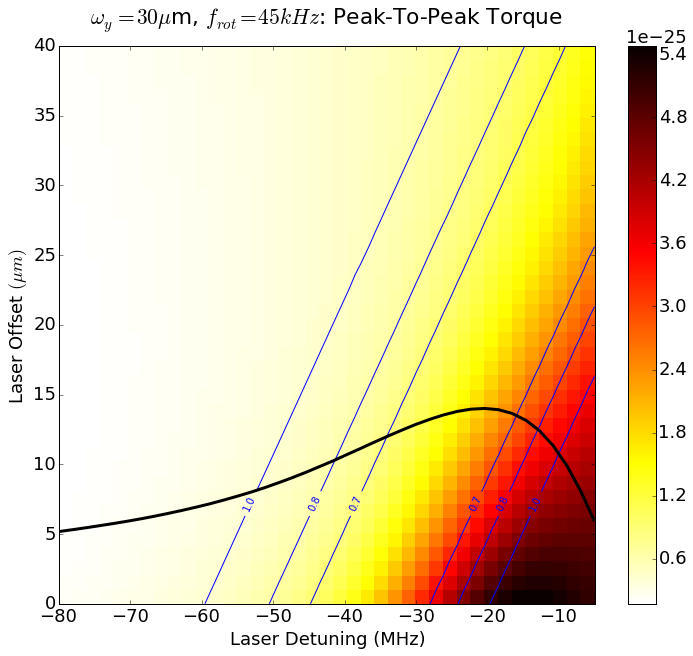

In [158]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

plt.rcParams['font.size'] = 18
Trq= A[3]
Trqmask = np.ma.array (Trq, mask=np.isnan(Teq))
#Teqmask= np.ma.array(Teqmask, mask = Teq>=40)


offsetmin,freqmin=np.unravel_index(Trqmask.argmin(), Trqmask.shape)

#offsetmin=np.argmin(Teqmask)
#freqmin=np.argmin(Teqmask)
#if freqmin>=len(df):
#    freqmin=freqmin-len(doffn)*(freqmin%len(df))

dfn=df*1.0E-6
doffn=doff*1.0E6    

CS= plt.figure(figsize=(12, 10))
cmap=plt.cm.hot_r
#cmap=shiftedColorMap(cmap,start=np.min(Trqmask),midpoint=0,stop=np.max(Trqmask))
cmap=shiftedColorMap(cmap,midpoint=.5)
CS = plt.pcolor(dfn,doffn, Trqmask, cmap=cmap, vmin=np.nanmin(Trqmask), vmax=np.nanmax(Trqmask))
CS=plt.ylim(doffn[0],doffn[-1])
CS=plt.xlim(dfn[0],dfn[-1])
CS=plt.xlabel('Laser Detuning $\Delta$ (MHz)')
CS=plt.ylabel('Laser Offset $d$ $(\mu m)$ ')
CS=plt.title('$\omega_y=30\mu$m, $f_{rot}= 45 kHz$: Peak-To-Peak Torque',y=1.03)
CS= plt.colorbar()
CS= plt.contour(dfn,doffn, Teqmask, colors='blue', levels=[.7,.8,1])
CS= plt.clabel(CS, inline=1, fontsize=10, fmt='%1.1f')
zer = plt.contour(dfn,doffn,A[1],colors="black",levels=[0],linewidths=3, label="O Torque")
#zer=plt.clabel(zer,inline=1,font_size=10,label="0")
leg=plt.legend(loc=2,fontsize=13,numpoints=1,fancybox=False)


# Training Wheel Plots for Presentation

Minimum temperature 0.630 mK occurs at detuning -5 MHz and offset 35 micron


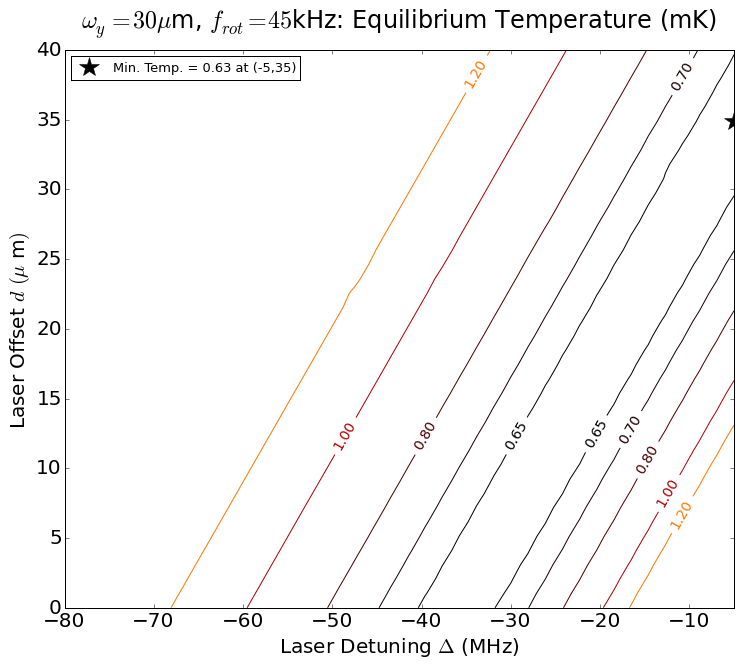

In [230]:
#
%matplotlib inline
import time
start_time = time.time()
import numpy as np
import scipy as sp
import scipy.optimize as opt
import scipy.integrate as integ
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
plt.rcParams['font.size'] = 20
Teq=A[0]*1000

Teqmask = np.ma.array (Teq, mask=np.isnan(Teq))
#Teqmask= np.ma.array(Teqmask, mask = Teq>=40)


offsetmin,freqmin=np.unravel_index(Teqmask.argmin(), Teqmask.shape)

#offsetmin=np.argmin(Teqmask)
#freqmin=np.argmin(Teqmask)
#if freqmin>=len(df):
#    freqmin=freqmin-len(doffn)*(freqmin%len(df))

df=np.linspace(-80.0E6,-5.0E6,40)
doff=np.linspace(0.0E-6,40.0E-6,40)

dfn=df*1.0E-6
doffn=doff*1.0E6    
print("Minimum temperature %.3f" %np.amin(Teqmask),"mK occurs at detuning %2.f" %dfn[freqmin],"MHz and offset %.f" %doffn[offsetmin],"micron")

CS= plt.figure(figsize=(12, 10))
cmap = plt.cm.Blues_r
#CS = plt.pcolor(dfn,doffn, Teqmask, cmap=cmap, vmin=np.nanmin(Teqmask), vmax=np.nanmax(Teqmask))
CS=plt.ylim(doffn[0],doffn[-1])
CS=plt.xlim(dfn[0],dfn[-1])
CS=plt.xlabel('Laser Detuning $\Delta$ (MHz)')
CS=plt.ylabel('Laser Offset $d$ $(\mu$ m$)$ ')
CS=plt.title('$\omega_y=30\mu$m, $f_{rot} = 45 $kHz: Equilibrium Temperature (mK)',y=1.03)
#CS= plt.colorbar()
CS= plt.contour(dfn,doffn, Teqmask, cmap="gist_heat", levels=[.65,.7,.8,1,1.2,1.4])
CS= plt.clabel(CS, inline=1, fontsize=14, fmt='%1.2f')
CS = plt.plot(dfn[freqmin],doffn[offsetmin],"*",color="black",markersize=20.0,
              label="Min. Temp. = %.2f at (%2.f,%2.f)" %(np.amin(Teqmask),dfn[freqmin], doffn[offsetmin]))
leg=plt.legend(loc=2,fontsize=13,numpoints=1,fancybox=False)
leg.get_frame().set_alpha(1)


Minimum temperature 0.630 mK occurs at detuning -5 MHz and offset 35 micron
0.651760739531 0.651760739531 4.48498236291 4.48498236291


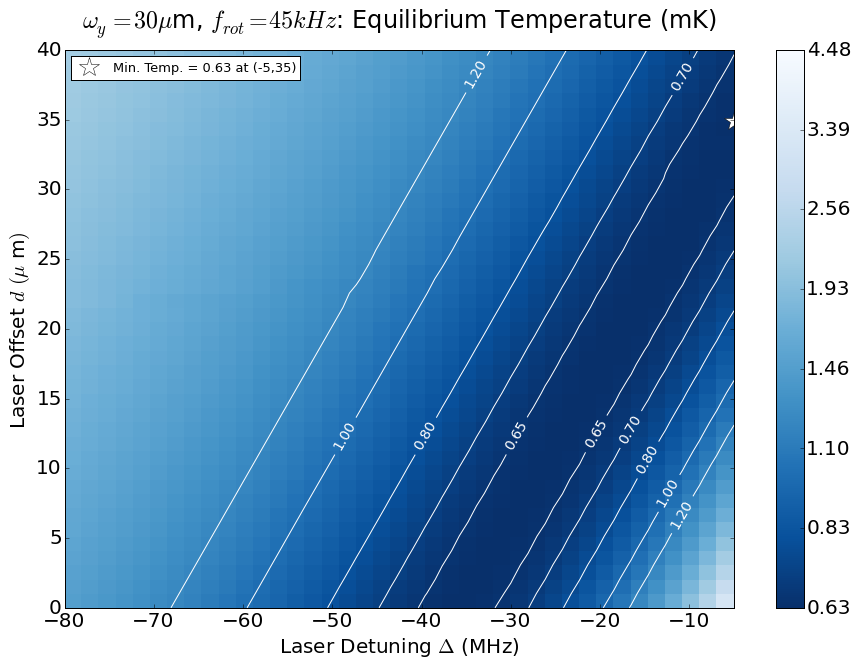

In [227]:
#
%matplotlib inline
import time
start_time = time.time()
import numpy as np
import scipy as sp
import scipy.optimize as opt
import scipy.integrate as integ
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
plt.rcParams['font.size'] = 20
Teq=A[0]*1000

Teqmask = np.ma.array (Teq, mask=np.isnan(Teq))
#Teqmask= np.ma.array(Teqmask, mask = Teq>=10)


offsetmin,freqmin=np.unravel_index(Teqmask.argmin(), Teqmask.shape)

#offsetmin=np.argmin(Teqmask)
#freqmin=np.argmin(Teqmask)
#if freqmin>=len(df):
#    freqmin=freqmin-len(doffn)*(freqmin%len(df))

dfn=df*1.0E-6
doffn=doff*1.0E6    
print("Minimum temperature %.3f" %np.amin(Teqmask),"mK occurs at detuning %2.f" %dfn[freqmin],"MHz and offset %.f" %doffn[offsetmin],"micron")

CS= plt.figure(figsize=(15, 10))
cmap = plt.cm.Blues_r
CS = plt.pcolor(dfn,doffn, np.log10(Teqmask), cmap=cmap, vmin=np.nanmin(np.log10(Teqmask)), vmax=np.nanmax(np.log10(Teqmask)))
CS=plt.ylim(doffn[0],doffn[-1])
CS=plt.xlim(dfn[0],dfn[-1])
CS=plt.xlabel('Laser Detuning $\Delta$ (MHz)')
CS=plt.ylabel('Laser Offset $d$ $(\mu$ m$)$ ')
CS=plt.title('$\omega_y=30\mu$m, $f_{rot}= 45 kHz$: Equilibrium Temperature (mK)',y=1.03)
cbar = plt.colorbar()
cmin,cmax = cbar.get_clim()
ticks=np.linspace(cmin,cmax,8)
print(ticks[-1],cmax,10**cmax,np.max(Teqmask))
cbar.set_ticks(ticks)
ticks=10**ticks
ticks=["%.2f" %label for label in ticks]

cbar.ax.set_yticklabels(ticks)
#cbar.ax.set_yticklabels([0,1,np.max(Teqmask)])
#cbar.set_label('Equilibrium Temperature (Log 10, mK)', rotation=270,x=200)
CS= plt.contour(dfn,doffn, Teqmask, colors="white", levels=[.65,.7,.8,1,1.2])
CS= plt.clabel(CS, inline=1, fontsize=14, fmt='%1.2f')
CS = plt.plot(dfn[freqmin],doffn[offsetmin],"*",color="white",markersize=20.0,
              label="Min. Temp. = %.2f at (%2.f,%2.f)" %(np.amin(Teqmask),dfn[freqmin], doffn[offsetmin]))
#CS = plt.plot(dfn[freqmin],doffn[offsetmin],"*",color="white",markersize=20.0,
#              label="Min. Temp. = %.2f at (%2.f,%2.f)" %(np.amin(Teqmask),dfn[freqmin], doffn[offsetmin]))
leg=plt.legend(loc=2,fontsize=13,numpoints=1,fancybox=False)
leg.get_frame().set_alpha(1)


C:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


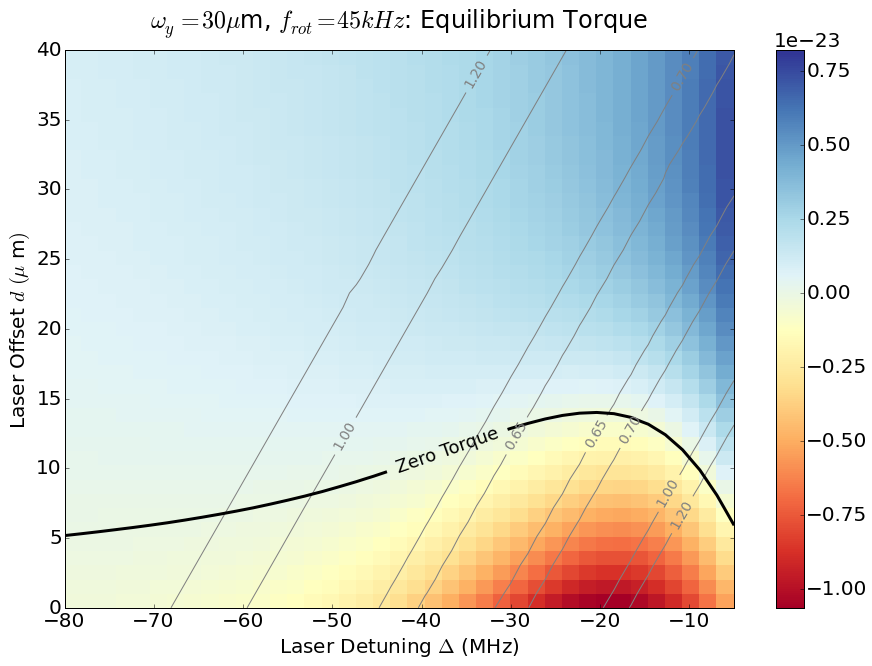

In [228]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

def shiftedColorMap(cmap, start=0, midpoint=0.5, stop=1.0, name='shiftedcmap'):
    '''
    Function to offset the "center" of a colormap. Useful for
    data with a negative min and positive max and you want the
    middle of the colormap's dynamic range to be at zero

    Input
    -----
      cmap : The matplotlib colormap to be altered
      start : Offset from lowest point in the colormap's range.
          Defaults to 0.0 (no lower ofset). Should be between
          0.0 and `midpoint`.
      midpoint : The new center of the colormap. Defaults to 
          0.5 (no shift). Should be between 0.0 and 1.0. In
          general, this should be  1 - vmax/(vmax + abs(vmin))
          For example if your data range from -15.0 to +5.0 and
          you want the center of the colormap at 0.0, `midpoint`
          should be set to  1 - 5/(5 + 15)) or 0.75
      stop : Offset from highets point in the colormap's range.
          Defaults to 1.0 (no upper ofset). Should be between
          `midpoint` and 1.0.
    '''
    cdict = {
        'red': [],
        'green': [],
        'blue': [],
        'alpha': []
    }

    # regular index to compute the colors
    reg_index = np.linspace(start, stop, 257)

    # shifted index to match the data
    shift_index = np.hstack([
        np.linspace(0.0, midpoint, 128, endpoint=False), 
        np.linspace(midpoint, 1.0, 129, endpoint=True)
    ])

    for ri, si in zip(reg_index, shift_index):
        r, g, b, a = cmap(ri)

        cdict['red'].append((si, r, r))
        cdict['green'].append((si, g, g))
        cdict['blue'].append((si, b, b))
        cdict['alpha'].append((si, a, a))

    newcmap = matplotlib.colors.LinearSegmentedColormap(name, cdict)
    plt.register_cmap(cmap=newcmap)

    return newcmap

plt.rcParams['font.size'] = 20
Trq= A[1]
Trqmask = np.ma.array (Trq, mask=np.isnan(Teq))
#Teqmask= np.ma.array(Teqmask, mask = Teq>=40)


offsetmin,freqmin=np.unravel_index(Trqmask.argmin(), Trqmask.shape)

#offsetmin=np.argmin(Teqmask)
#freqmin=np.argmin(Teqmask)
#if freqmin>=len(df):
#    freqmin=freqmin-len(doffn)*(freqmin%len(df))

dfn=df*1.0E-6
doffn=doff*1.0E6    

CS= plt.figure(figsize=(15, 10))
cmap=plt.cm.RdYlBu
#cmap=shiftedColorMap(cmap,start=np.min(Trqmask),midpoint=0,stop=np.max(Trqmask))
cmap=shiftedColorMap(cmap,midpoint=.5)
CS = plt.pcolor(dfn,doffn, Trqmask, cmap=cmap, vmin=np.nanmin(Trqmask), vmax=np.nanmax(Trqmask))
CS=plt.ylim(doffn[0],doffn[-1])
CS=plt.xlim(dfn[0],dfn[-1])
CS=plt.xlabel('Laser Detuning $\Delta$ (MHz)')
CS=plt.ylabel('Laser Offset $d$ $(\mu$ m$)$ ')
CS=plt.title('$\omega_y=30\mu$m, $f_{rot}= 45 kHz$: Equilibrium Torque',y=1.03)
CS= plt.colorbar()
CS= plt.contour(dfn,doffn, Teqmask, colors='gray', levels=[.65,.7,1,1.2])
CS= plt.clabel(CS, inline=1, fontsize=14, fmt='%1.2f')

theline = plt.contour(dfn,doffn,Trqmask,colors="black",levels=[0],linewidths=3, fmt="O Torque")

fmt = {}
strs = [ 'Zero Torque' ]
for l,s in zip( theline.levels, strs ):
    fmt[l] = s
plt.clabel(theline,theline.levels[::2],inline=True,fmt=fmt,fontsize=18)


leg=plt.legend(loc=2,fontsize=13,numpoints=1,fancybox=False)


Minimum temperature 0.630 mK occurs at detuning -5 MHz and offset 35 micron
1.0989896394 1.0989896394 12.56 4.48498236291


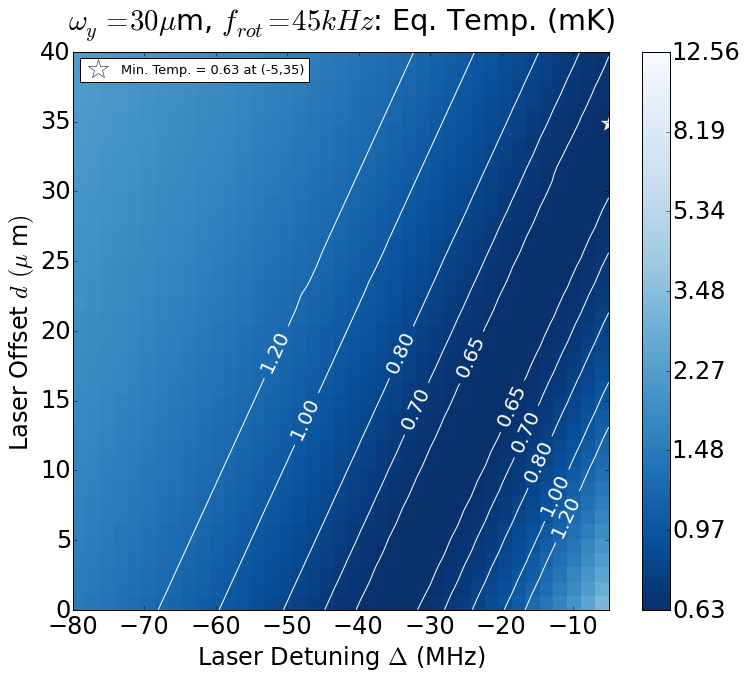

In [24]:
#
%matplotlib inline
import time
start_time = time.time()
import numpy as np
import scipy as sp
import scipy.optimize as opt
import scipy.integrate as integ
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
plt.rcParams['font.size'] = 24
Teq=A[0]*1000

Teqmask = np.ma.array (Teq, mask=np.isnan(Teq))
#Teqmask= np.ma.array(Teqmask, mask = Teq>=10)


offsetmin,freqmin=np.unravel_index(Teqmask.argmin(), Teqmask.shape)

#offsetmin=np.argmin(Teqmask)
#freqmin=np.argmin(Teqmask)
#if freqmin>=len(df):
#    freqmin=freqmin-len(doffn)*(freqmin%len(df))

dfn=df*1.0E-6
doffn=doff*1.0E6    
print("Minimum temperature %.3f" %np.amin(Teqmask),"mK occurs at detuning %2.f" %dfn[freqmin],"MHz and offset %.f" %doffn[offsetmin],"micron")

CS= plt.figure(figsize=(12, 10))
cmap = plt.cm.Blues_r
CS = plt.pcolor(dfn,doffn, np.log10(Teqmask), cmap=cmap, vmin=np.log10(.63), vmax=np.log10(12.56))
CS=plt.ylim(doffn[0],doffn[-1])
CS=plt.xlim(dfn[0],dfn[-1])
CS=plt.xlabel('Laser Detuning $\Delta$ (MHz)')
CS=plt.ylabel('Laser Offset $d$ $(\mu$ m$)$ ')
CS=plt.title('$\omega_y=30\mu$m, $f_{rot}= 45 kHz$: Eq. Temp. (mK)',y=1.03)
cbar = plt.colorbar()
#cmin,cmax = cbar.get_clim()
cmin=np.log10(.63)
cmax=np.log10(12.56)
ticks=np.linspace(cmin,cmax,8)
print(ticks[-1],cmax,10**cmax,np.max(Teqmask))
cbar.set_ticks(ticks)
ticks=10**ticks
ticks=["%.2f" %label for label in ticks]

cbar.ax.set_yticklabels(ticks)
#cbar.ax.set_yticklabels([0,1,np.max(Teqmask)])
#cbar.set_label('Equilibrium Temperature (Log 10, mK)', rotation=270,x=200)
CS= plt.contour(dfn,doffn, Teqmask, colors="white", levels=[.65,.7,.8,1,1.2])
CS= plt.clabel(CS, inline=1, fontsize=20, fmt='%1.2f')
CS = plt.plot(dfn[freqmin],doffn[offsetmin],"*",color="white",markersize=20.0,
              label="Min. Temp. = %.2f at (%2.f,%2.f)" %(np.amin(Teqmask),dfn[freqmin], doffn[offsetmin]))
#CS = plt.plot(dfn[freqmin],doffn[offsetmin],"*",color="white",markersize=20.0,
#              label="Min. Temp. = %.2f at (%2.f,%2.f)" %(np.amin(Teqmask),dfn[freqmin], doffn[offsetmin]))
leg=plt.legend(loc=2,fontsize=13,numpoints=1,fancybox=False)
leg.get_frame().set_alpha(1)
